In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [4]:
columns = ["id","title","budget","genre","popularity","release_date","revenue","runtime","vote_average"]
    


target = ["revenue"]

In [5]:
revenue =df["revenue"].tolist()
revenue

NameError: name 'df' is not defined

In [6]:
# Load the data
file_path = Path('movie_data.csv')
df = pd.read_csv(file_path,)
df = df.loc[:,columns].copy()

# Drop the null columns where all values are null
movies_df = df.dropna(axis='columns', how='all')

# Drop the null rows
movies_df = df.dropna()

# Convert the target column values to low_Earners and high_Earners based on their values
#x = {'Current': 'low_earner'}   
#df = df.replace(x)
   
#x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_earner')    
#df = df.replace(x)

#df.reset_index(inplace=True, drop=True)




df.head()

,id,title,budget,genre,popularity,release_date,revenue,runtime,vote_average
0,100,"Lock, Stock and Two Smoking Barrels",1350000,Crime,4.60786,1998-03-05,3897569.0,105.0,7.5
1,100,"Lock, Stock and Two Smoking Barrels",1350000,Comedy,4.60786,1998-03-05,3897569.0,105.0,7.5
2,10003,The Saint,68000000,Action,10.97633,1997-04-03,118063304.0,116.0,5.9
3,10003,The Saint,68000000,Adventure,10.97633,1997-04-03,118063304.0,116.0,5.9
4,10003,The Saint,68000000,Science Fiction,10.97633,1997-04-03,118063304.0,116.0,5.9


In [7]:
mean_revenue=df["revenue"].mean()
mean_revenue

65358375.04014965

Split the Data into Training and Testing

In [8]:
# Create our features
X = movies_df.drop(["revenue","id"], axis=1)

X = pd.get_dummies(X)

# Create our target
y = movies_df["revenue"]

In [9]:
X.describe()

,budget,popularity,runtime,vote_average,title_#Horror,title_(500) Days of Summer,title_.45,title_1. Mai – Helden bei der Arbeit,title_10 Cloverfield Lane,title_10 Days in a Madhouse,...,release_date_2017-07-11,release_date_2017-07-19,release_date_2017-07-20,release_date_2017-07-26,release_date_2017-07-28,release_date_2017-08-03,release_date_2017-08-04,release_date_2017-10-27,release_date_2018-03-01,release_date_2018-12-31
count,2.190500e+04,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,...,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000
mean,2.551612e+07,8.066245,106.838347,6.053947,0.000183,0.000137,0.000137,0.000046,0.000137,0.000046,...,0.000137,0.000228,0.000137,0.000091,0.000457,0.000411,0.000091,0.000091,0.000183,0.000091
std,3.798007e+07,13.034695,28.544919,1.138666,0.013512,0.011702,0.011702,0.006757,0.011702,0.006757,...,0.011702,0.015107,0.011702,0.009555,0.021362,0.020266,0.009555,0.009555,0.013512,0.009555
min,1.000000e+00,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.745000e+06,2.727017,92.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+07,6.865513,102.000000,6.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000e+07,10.586815,117.000000,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,547.488298,705.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X.shape

(21905, 14112)

In [11]:
# Check the balance of our target values
y.value_counts()

0.0           7858
12000000.0      45
2000000.0       41
10000000.0      37
11000000.0      35
              ... 
33828318.0       1
18599102.0       1
11806119.0       1
46770602.0       1
5731103.0        1
Name: revenue, Length: 4998, dtype: int64

In [12]:
# splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Random Forest Regressor

In [13]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)


(17524, 14112) (4381, 14112) (17524,) (4381,)


In [14]:
print(y_train.shape)

(17524,)


In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
random_forest = RandomForestRegressor(n_estimators = 25, random_state =25)

In [17]:
#Fitting the model
Revenue_rf= random_forest.fit(X_train, y_train)

In [18]:
#Training model evaluation

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [20]:
# The training r_sq
print('The training r_sq is: %.2f'% Revenue_rf.score(X_train, y_train))

The training r_sq is: 0.99


In [21]:
# Prediction on the training dataset
ytrain_pred = Revenue_rf.predict(X_train)

In [22]:
# The MAE
print('The MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))

The MAE is: 4445869.55


In [23]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_train, ytrain_pred))

The MSE is: 196688126002954.66


In [24]:
# THe RMSE
import numpy as np
print('The RME is %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RME is 14024554.40


In [25]:
# The EVS 
print('The EVS is: %.2f'% explained_variance_score(y_train, ytrain_pred))

The EVS is: 0.99


In [26]:
#Prediction on the testing data
ytest_pred = Revenue_rf.predict(X_test)

In [27]:
print(ytest_pred[:10])

[2.57792652e+08 5.21327400e+05 0.00000000e+00 0.00000000e+00
 6.03273748e+06 2.19264000e+07 2.83842634e+07 6.31560000e+02
 1.31133785e+08 7.65699516e+07]


In [28]:
#The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, ytest_pred))

The testing r_sq is: 0.95


In [29]:
# Or
print('The testing r_sq is: %.2f'% Revenue_rf.score(X_test, y_test))

The testing r_sq is: 0.95


In [30]:
# The metrics

In [31]:
# The MAE
print('The MAE is: %.2f'% mean_absolute_error(y_test, ytest_pred))

The MAE is: 12268441.70


In [32]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_test, ytest_pred))

The MSE is: 1260955511762357.75


In [33]:
# The RMSE
print('The RMSE:',np.sqrt(mean_squared_error(y_test, ytest_pred)))

The RMSE: 35509935.3950744


In [34]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, ytest_pred))

The EVS is: 0.96


<function matplotlib.pyplot.show(close=None, block=None)>

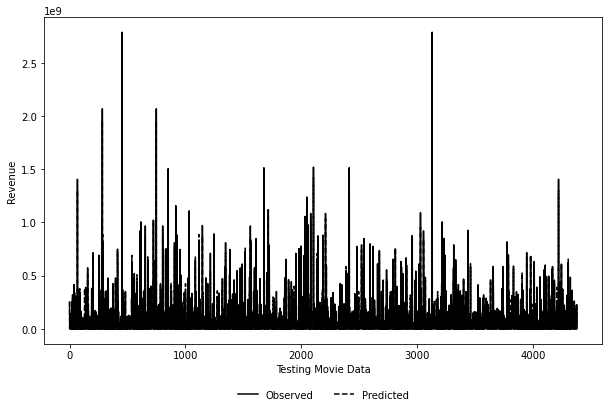

In [35]:
#Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] =(10,6)
x_ax = range(len(X_test))
#Plotting
plt.plot(x_ax, y_test, label = 'Observed', color ='k', linestyle ='-')
plt.plot(x_ax, ytest_pred, label = 'Predicted', color ='k', linestyle = '--')
plt.ylabel('Revenue')
plt.xlabel('Testing Movie Data')
plt.legend(bbox_to_anchor =(0.5, -0.2), loc ='lower center', ncol =2, frameon = False)
plt.show

In [36]:
#Plotting the prediction errors and residuals using yellowbrick
# Anaconda/Cmd prompt and type : pip install yellowbrick


0.9541742825073448

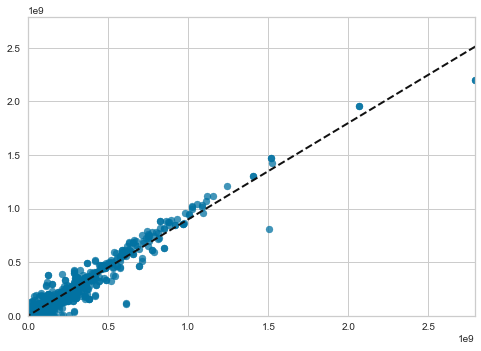

In [37]:
#Plotting the prediction errors
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
#from yellowbrick.regressor import proof
visualizer = PredictionError(Revenue_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.proof()

0.9541742825073448

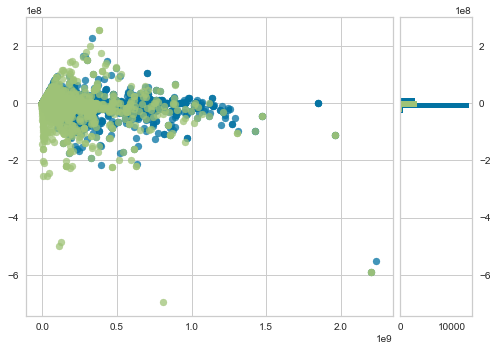

In [38]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
#from yellowbrick.regressor import proof
visualizer = ResidualsPlot(Revenue_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.proof()

In [39]:
# The k-folds CV
from sklearn.model_selection import cross_val_score

In [40]:
seed =7

In [41]:
# Training model CV
score_train = cross_val_score(Revenue_rf, X_train, y_train, scoring ="neg_mean_squared_error", cv=10)

In [42]:
score_train

array([-2.26026762e+15, -1.13425854e+15, -1.16240711e+15, -1.30426844e+15,
       -1.90775937e+15, -9.38871578e+14, -1.38555861e+15, -1.17080585e+15,
       -1.25693732e+15, -1.75227702e+15])

In [43]:
# The mean score
print(np.mean(score_train))

-1427341147393636.5


In [44]:
# The  absolutevmean score
from numpy import absolute
print(absolute(np.mean(score_train)))

1427341147393636.5


In [45]:
# The testing model CV
score_test = cross_val_score(Revenue_rf,X_test, y_test, scoring = 'neg_mean_squared_error', cv=10)

In [46]:
score_test

array([-4.89984274e+15, -7.07374620e+15, -5.81524092e+15, -4.38175429e+15,
       -4.70378482e+15, -6.70803995e+15, -6.19887380e+15, -5.42787064e+15,
       -2.70787894e+15, -3.82522966e+15])

In [47]:
print(absolute(np.mean(score_test)))

5174226194541378.0


In [48]:
# Random Forest Feature Ranking
#import pandas as pd
from sklearn.pipeline import Pipeline

In [49]:
f_list = list(X.columns)
f_importance = pd.Series(Revenue_rf.feature_importances_,index= f_list).sort_values(ascending =False)

In [50]:
print(f_importance)

budget                       0.533977
popularity                   0.188635
vote_average                 0.048593
runtime                      0.035119
title_Avatar                 0.008943
                               ...   
title_The Grave              0.000000
title_The Grapes of Wrath    0.000000
title_The Grand              0.000000
title_The Gore Gore Girls    0.000000
release_date_2018-12-31      0.000000
Length: 14112, dtype: float64


In [51]:
# List the features sorted in descending order by feature importance
feature_names = X.columns
sorted(zip(random_forest.feature_importances_, feature_names), reverse=True)

[(0.5339767485277839, 'budget'),
 (0.18863515250677898, 'popularity'),
 (0.04859269480552582, 'vote_average'),
 (0.03511895016548199, 'runtime'),
 (0.008942716954600548, 'title_Avatar'),
 (0.006819387826344512, 'release_date_2009-12-10'),
 (0.0058907372268520095, 'title_Star Wars: The Force Awakens'),
 (0.004129278964634163, 'title_Jurassic World'),
 (0.0030614060568728485, 'release_date_1992-11-25'),
 (0.00254371414409634, 'title_Titanic'),
 (0.0023496783703392987, 'release_date_2015-12-15'),
 (0.002104824284584684, 'title_Despicable Me 3'),
 (0.0018643415611976544, 'title_Jurassic Park'),
 (0.0016620266570165846, 'title_Ice Age: Dawn of the Dinosaurs'),
 (0.0016349250226813045, 'title_E.T. the Extra-Terrestrial'),
 (0.001624385230039412, 'release_date_2009-06-29'),
 (0.0015925817443429025, 'title_The Secret Life of Pets'),
 (0.0015235722912731093, 'release_date_1993-06-11'),
 (0.001500505225419443, 'title_Ice Age: Continental Drift'),
 (0.001393402525904506, 'title_Ghost'),
 (0.00133

In [52]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined